In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings("ignore")

In [44]:
#read data
data = pd.read_csv("/content/winequality-red.csv")

In [20]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,NaN,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,NaN,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
data.shape

(1599, 12)

In [23]:
data.isnull().sum()

fixed acidity           17
volatile acidity        16
citric acid             15
residual sugar          15
chlorides                1
free sulfur dioxide      2
total sulfur dioxide     0
density                  0
pH                       0
sulphates               17
alcohol                  0
quality                  0
dtype: int64

In [24]:
set(data.quality.to_list())

{3, 4, 5, 6, 7, 8}

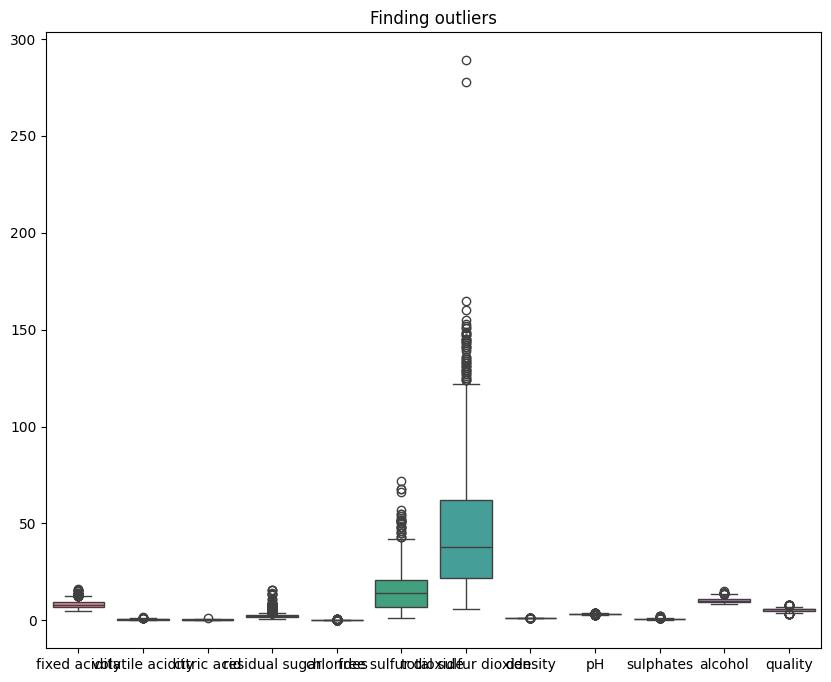

In [36]:
data_fill = data.fillna(data.mean())
plt.figure(figsize=(10,8))
sns.boxplot(data=data_fill)
plt.title('Finding outliers')
plt.show()

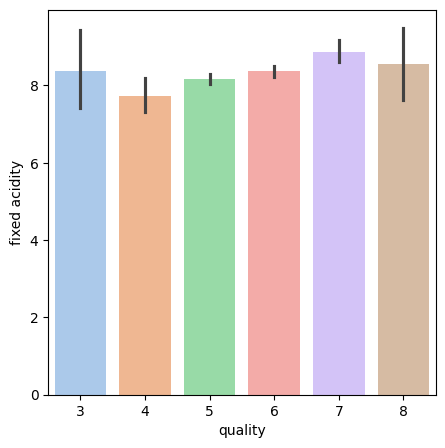

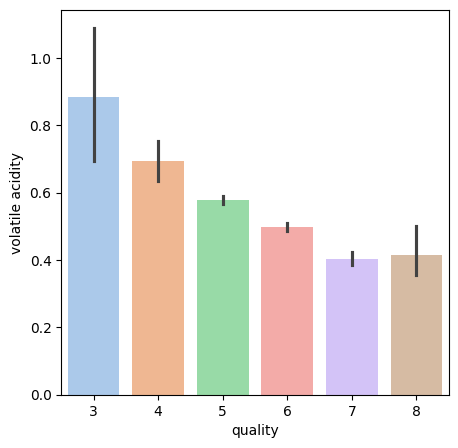

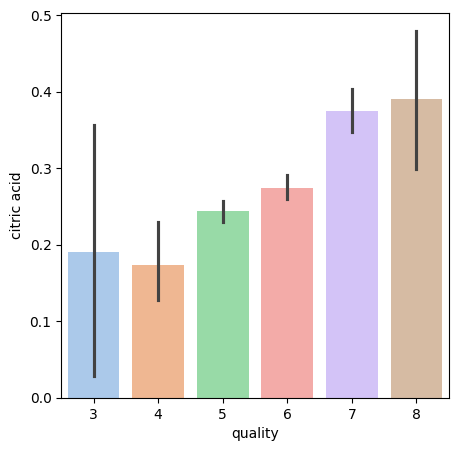

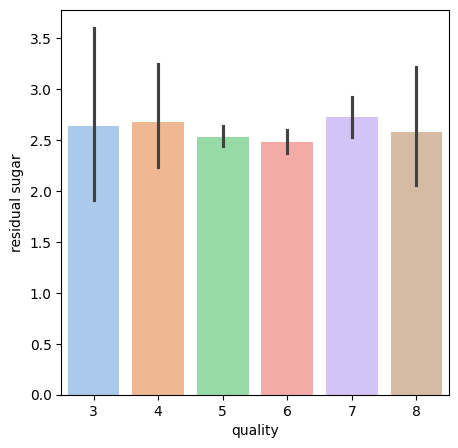

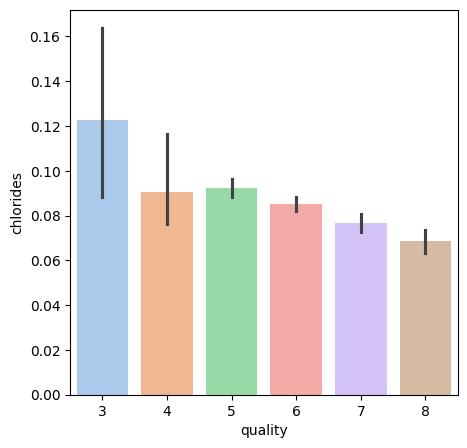

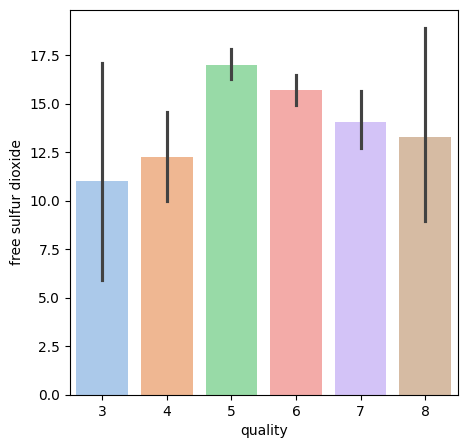

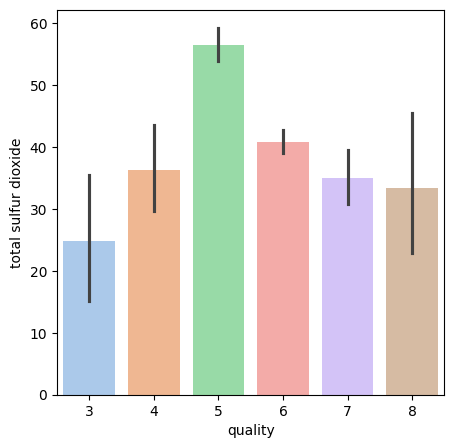

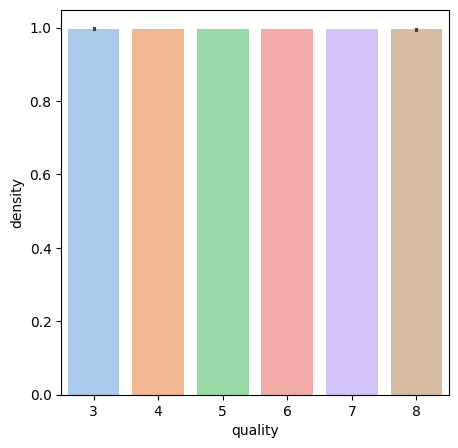

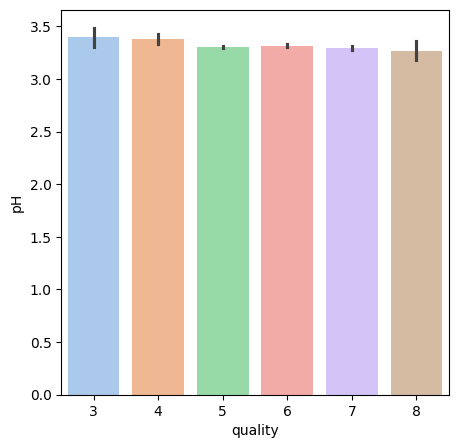

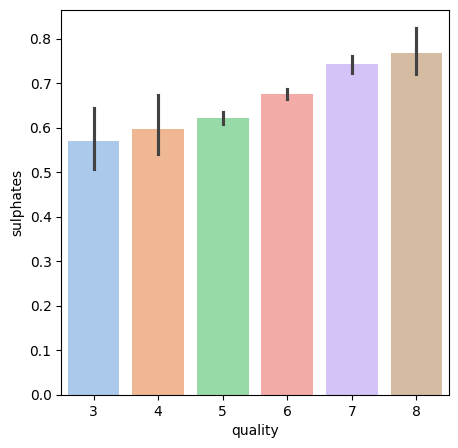

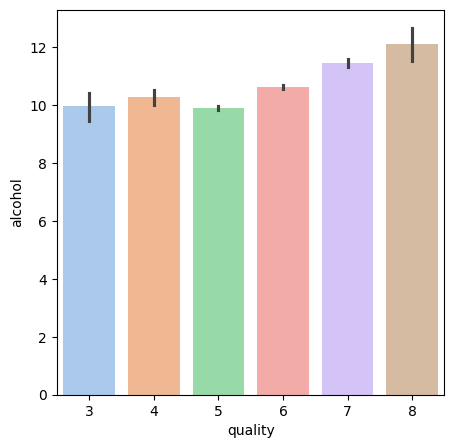

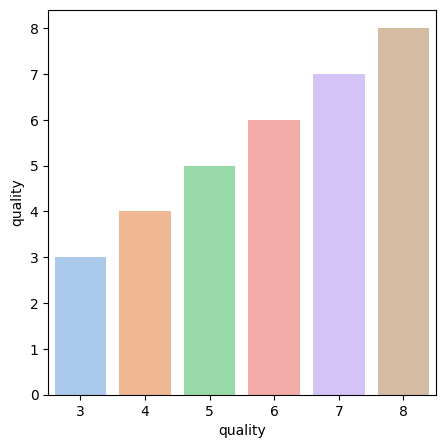

In [25]:
for col in data.columns:
    plot = plt.figure(figsize=(5,5))
    sns.barplot(x='quality', y = col, data = data, palette = 'pastel')

In [37]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

outliers = ((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)

In [38]:
cleaned_data = data[~outliers]
cleaned_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,NaN,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,NaN,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


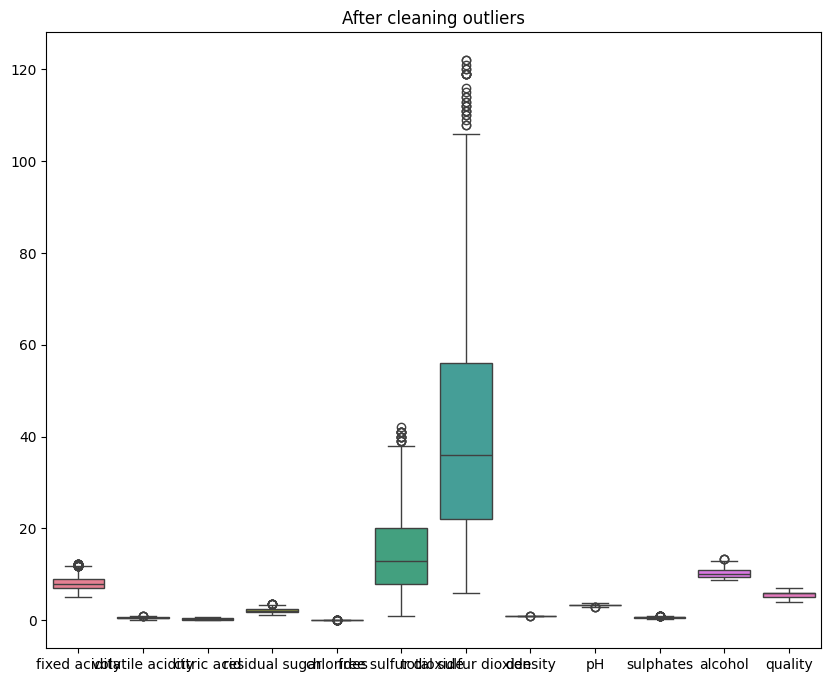

In [39]:
plt.figure(figsize=(10,8))
sns.boxplot(data=cleaned_data)
plt.title('After cleaning outliers')
plt.show()

In [40]:
def wine_quality(quality):
    if quality in range(3, 7):
        return 'Bad'
    elif quality in [7, 8]:
        return 'Good'

data_fill['label'] = data_fill['quality'].apply(wine_quality)

data_fill.drop(columns=['quality'], inplace=True)

print(data_fill['label'].value_counts())

Bad     1382
Good     217
Name: label, dtype: int64


In [45]:
label_encoder = LabelEncoder()
data['quality'] = label_encoder.fit_transform(data['quality'])

x = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
y = 'quality'
X = data[x]
y = data[y]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_imputed)
X_test_scaled = sc.transform(X_test_imputed)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred,average='macro')
print("Recall:", recall)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.65625
Precision: 0.6252739239141092
Recall: 0.3211871461871462
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.70      0.76      0.73       130
           3       0.62      0.69      0.65       132
           4       0.65      0.48      0.55        42
           5       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.63      0.66      0.64       320

